# **Enhancing Customer Retention through Churn Prediction: A Machine Learning Approach to Classification Models**

## **Importing necessary packages**

In [79]:
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings. filterwarnings('ignore')

## **Data Collection** 

### Loading From Database

In [80]:
# Loading environment variables from .env file
environment_variables = dotenv_values('.env')

# Getting the values for the credentials set in the .env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

# Creating a connection string
connection_string = f"DRIVER={{SQL Server}}; \
                    SERVER={server}; \
                    DATABASE={database}; \
                    UID={username}; \
                    PWD={password};"

# Connecting to the server
connection = pyodbc.connect(connection_string)

In [81]:
# Loading First dataset 3000 records
first_data = pd.read_sql_query(
    "SELECT * FROM dbo.LP2_Telco_churn_first_3000", connection)

# Saving the DataFrame to a CSV file
first_data.to_csv('data/LP2_Telco_churn_first_3000.csv', index=False)

first_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


### Loading from csv files

In [83]:
# Loading Second dataset 2000 records
second_data = pd.read_csv('data\LP2_Telco-churn-second-2000.csv')

# Data preview
second_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [84]:
# Loading Test data
test_data = pd.read_excel('data\Telco-churn-last-2000.xlsx')

# Data preview
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


## **Data Information**

In [85]:
first_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [86]:
second_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [87]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


## **Data Cleaning**

In [88]:
#Cheking for null values:
first_data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [89]:
# Imputing with the mode for categorical columns
categorical_columns = first_data.select_dtypes(
    include=['object', 'bool']).columns
for column in categorical_columns:
    if first_data[column].isnull().any():
        mode_value = first_data[column].mode()[0]
        first_data[column].fillna(mode_value, inplace=True)

In [90]:
# Convert True/False to 0/1 for SeniorCitizen in the first dataset to match the second dataset
# where true = 1 and false = 0
first_data['SeniorCitizen'] = first_data['SeniorCitizen'].apply(lambda x: 1 if x else 0)

# Convert booleans to 'Yes'/'No' for other columns in the first dataset
bool_columns = ['Partner', 'Dependents', 'Churn', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                'PaperlessBilling']
for col in bool_columns:
    first_data[col] = first_data[col].map({True: 'Yes', False: 'No'}).fillna('No')

# Merging the first and second datasets
train_data = pd.concat([first_data, second_data], ignore_index=True)

In [91]:
# Converting 'TotalCharges' to numeric, 
train_data['TotalCharges'] = pd.to_numeric(
    train_data['TotalCharges'], errors='coerce')
test_data['TotalCharges'] = pd.to_numeric(
    test_data['TotalCharges'], errors='coerce')

# Filling missing values with the mean value of the column
mean_total_charges = train_data['TotalCharges'].mean()
train_data['TotalCharges'].fillna(mean_total_charges, inplace=True)
test_data['TotalCharges'].fillna(mean_total_charges, inplace=True)

In [92]:
# Saving the cleaned dataset to a CSV file
train_data.to_csv('data/train_data.csv', index=False)
test_data.to_csv('data/test_data.csv', index=False)

## **Exploritory Data Analysis (EDA)** 

In [95]:
train_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,5043,5043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,5043,2,Male,2559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,5043.0,NaN,NaN,NaN,0.162403,0.368857,0.0,0.0,0.0,0.0,1.0
Partner,5043,2,No,2585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,5043,2,No,3482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,5043.0,NaN,NaN,NaN,32.576641,24.529807,0.0,9.0,29.0,56.0,72.0
PhoneService,5043,2,Yes,4554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,5043,3,No,2693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,5043,3,Fiber optic,2248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,5043,3,No,3158,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Categorical Variables
- **Gender**: Nearly evenly split between males and females, with males slightly more prevalent. This suggests that gender-specific targeting may not be necessary for churn prevention strategies.

- **Senior Citizen**: Only about `16.2%` of the customers are senior citizens, which could be a niche market to explore for specific services or retention strategies.

- **Partner and Dependents**: A slight majority do not have a partner `51%` or dependents `69%`. This could indicate that single, independent individuals may be a significant demographic, possibly with different needs or usage patterns.

- **Phone Service**: Almost `90% `of customers have phone service, indicating a saturation of this service and possibly lower churn risk here compared to other services.

- **Multiple Lines**: The majority do not have multiple lines `53%`, but there's a significant portion that does, suggesting varied needs in communication services.

- **Internet Service**: Fiber optic is the most common type of internet service `45%`, followed by DSL. The popularity of fiber optic could indicate a demand for high-speed internet but may also highlight issues like higher costs or service satisfaction affecting churn.

- **Online Security, Online Backup, Device Protection, Tech Support**: Most customers do not subscribe to these services. This could point to potential areas for increasing service uptake and reducing churn by bundling these value-added services.

- **Streaming TV and Streaming Movies**: Slightly more customers have streaming movies than TV. This might suggest a preference or trend towards movie streaming, which could be leveraged in service packages.

- **Contract**: More than half of the customers are on a month-to-month contract, associated with higher churn rates. This is a critical area to focus on for retention strategies, possibly by encouraging longer contract terms.

- **Paperless Billing**: About `59%` use paperless billing, indicating a significant shift towards digital solutions.

- **Payment Method**: The most common payment method is electronic check `34%`, which could be correlated with churn, suggesting a review of payment options might influence customer satisfaction and retention.

### Numerical Variables
- **Tenure**: Ranges from `0` to `72` months, with an average of about `32.5` months. Longer tenure correlates strongly with lower churn, indicating the importance of focusing retention strategies on newer customers.

- **Monthly Charges**: Average monthly charges are about `$65.09`, but range widely from `$18.4` to `$118.65`, suggesting diverse service plans and possibly different price sensitivities among customers.

- **Total Charges**: Reflects the total amount spent by customers over time and varies widely, suggesting differing levels of customer engagement and investment in the services.


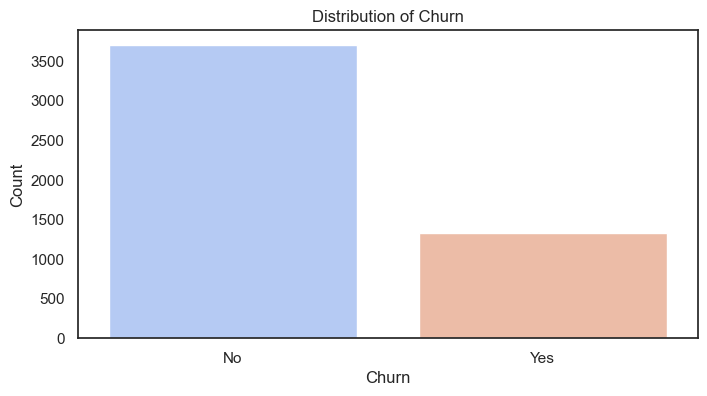

In [115]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Churn', data=train_data, palette='coolwarm')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

### Churn
- The majority of the dataset consists of customers who have not churned `74%`, which is good but also highlights the importance of understanding why the remaining `26%` left.

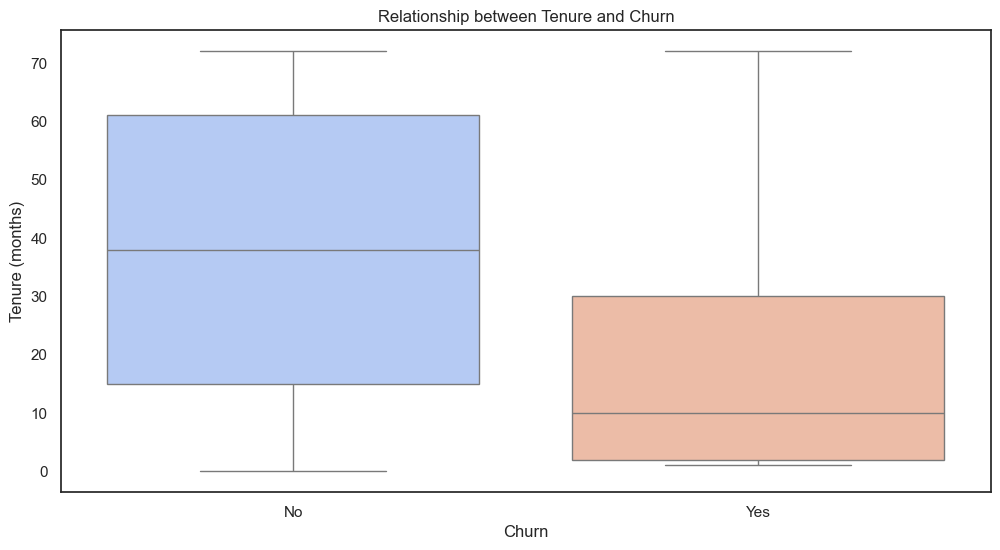

In [116]:
# Exploring the relationship between 'tenure' and 'Churn'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='tenure', data=train_data, palette='coolwarm')
plt.title('Relationship between Tenure and Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show()

- Customers who do not churn tend to have a higher tenure. This suggests that the longer a customer stays with the service, the less likely they are to churn.

- Customers who churn generally have a shorter tenure, indicating that churn is more frequent early in the customer relationship.

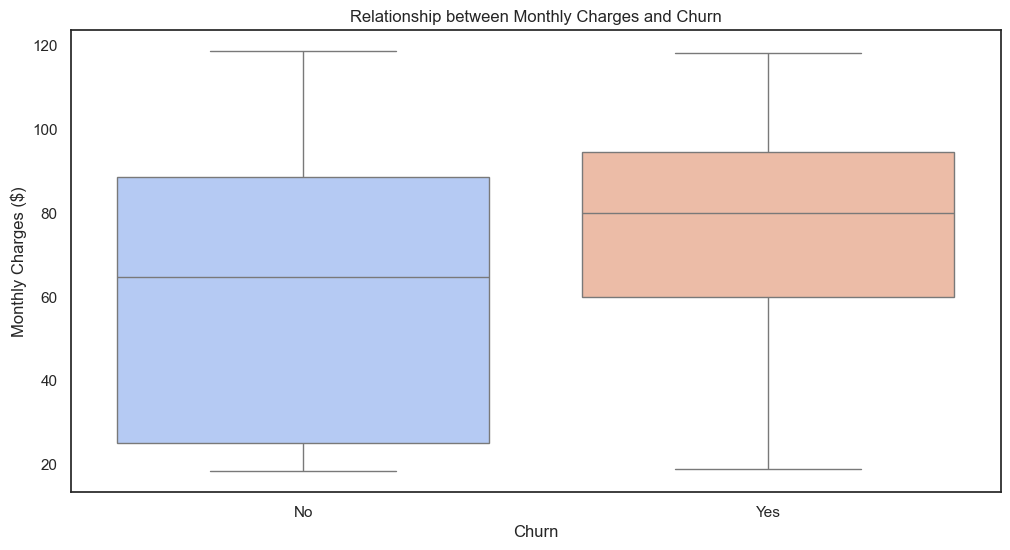

In [117]:
# Exploring the relationship between 'MonthlyCharges' and 'Churn'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=train_data, palette='coolwarm')
plt.title('Relationship between Monthly Charges and Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges ($)')
plt.show()

- The monthly charges are generally higher for customers who churn. This might indicate that higher costs could be a factor in the decision to leave the service.

- Customers who do not churn tend to have a wider range of monthly charges but with a lower median, suggesting they might be on more economical plans.

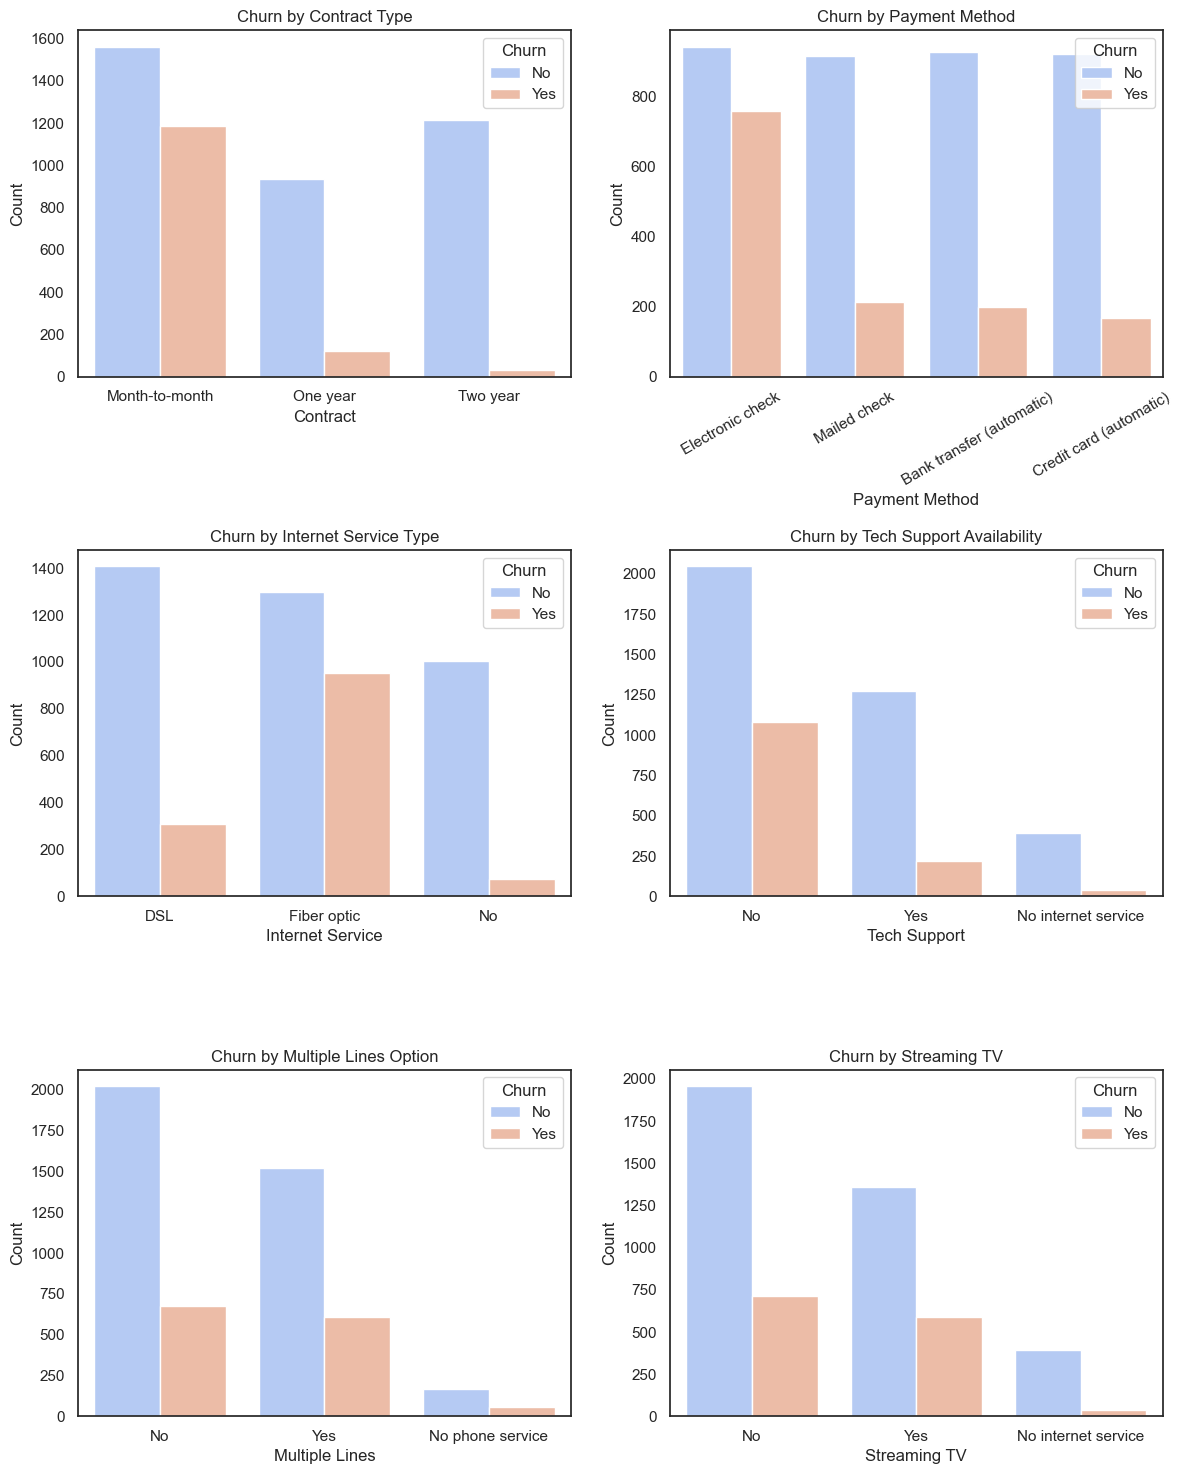

In [118]:
# Let's explore the relationships between some categorical variables and churn
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
plt.subplots_adjust(hspace=0.5)

# Contract vs Churn
sns.countplot(ax=axes[0, 0], x='Contract', hue='Churn', data=train_data, palette='coolwarm')
axes[0, 0].set_title('Churn by Contract Type')
axes[0, 0].set_xlabel('Contract')
axes[0, 0].set_ylabel('Count')

# PaymentMethod vs Churn
sns.countplot(ax=axes[0, 1], x='PaymentMethod', hue='Churn', data=train_data, palette='coolwarm')
axes[0, 1].set_title('Churn by Payment Method')
axes[0, 1].set_xlabel('Payment Method')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=30)

# InternetService vs Churn
sns.countplot(ax=axes[1, 0], x='InternetService', hue='Churn', data=train_data, palette='coolwarm')
axes[1, 0].set_title('Churn by Internet Service Type')
axes[1, 0].set_xlabel('Internet Service')
axes[1, 0].set_ylabel('Count')

# TechSupport vs Churn
sns.countplot(ax=axes[1, 1], x='TechSupport', hue='Churn', data=train_data, palette='coolwarm')
axes[1, 1].set_title('Churn by Tech Support Availability')
axes[1, 1].set_xlabel('Tech Support')
axes[1, 1].set_ylabel('Count')

# MultipleLines vs Churn
sns.countplot(ax=axes[2, 0], x='MultipleLines', hue='Churn', data=train_data, palette='coolwarm')
axes[2, 0].set_title('Churn by Multiple Lines Option')
axes[2, 0].set_xlabel('Multiple Lines')
axes[2, 0].set_ylabel('Count')

# StreamingTV vs Churn
sns.countplot(ax=axes[2, 1], x='StreamingTV', hue='Churn', data=train_data, palette='coolwarm')
axes[2, 1].set_title('Churn by Streaming TV')
axes[2, 1].set_xlabel('Streaming TV')
axes[2, 1].set_ylabel('Count')

plt.show()

**Churn by Contract Type**
- Customers with month-to-month contracts are more likely to churn compared to those with longer-term contracts. This suggests that customers on short-term commitments feel less bound and possibly less satisfied, leading to higher churn rates.  

**Churn by Payment Method**
- The method of payment also seems to influence churn, with electronic checks showing a higher churn rate. This might be due to the demographics or the convenience factors associated with this payment method.  

**Churn by Internet Service Type**
- Customers with fiber optic services show a higher churn rate compared to those with DSL. This might reflect issues like cost or service expectations not being met with the higher-speed option.  

**Churn by Tech Support Availability**
- Having tech support appears to be a significant factor in retention, as customers without tech support show higher churn rates. This suggests that better customer support could improve customer retention.  

**Churn by Multiple Lines Option**
- There isn't a stark difference in churn rates based on whether customers have multiple lines or not, suggesting that simply having multiple lines isn't a deciding factor for churn.  

**Churn by Streaming TV**
- Customers who subscribe to streaming TV services have slightly higher churn rates, particularly those without the service. This might suggest that value-added services like streaming could either be a retention tool or a point of dissatisfaction if not handled correctly.  

## **Hypothesis Testing**

### Null Hypothesis (H0)
- "There is no difference in monthly charges `median` between customers who churn and those who do not churn."

### Alternative Hypothesis (H1)
- "There is a difference in monthly charges `median` between customers who churn and those who do not churn."

In [123]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Assuming 'Churn' column contains 'Yes' for churned and 'No' for not churned
charges_churned = train_data[train_data['Churn'] == 'Yes']['MonthlyCharges']
charges_not_churned = train_data[train_data['Churn'] == 'No']['MonthlyCharges']

# Perform the Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(charges_churned, charges_not_churned, alternative='two-sided')

# Print the results
print("U Statistic:", u_statistic)
print("P-value:", p_value)

U Statistic: 3100791.0
P-value: 1.2019873209608733e-42


In [125]:
# Typically, an alpha level of 0.05 is used to determine significance
alpha = 0.05
if p_value < alpha:
    print("We Reject the Null Hypothesis: There is a significant difference in monthly charges between churned and not churned customers.")
else:
    print("We Fail to Reject the Null Hypothesis: There is no significant difference in monthly charges between churned and not churned customers.")

We Reject the Null Hypothesis: There is a significant difference in monthly charges between churned and not churned customers.


## **Business Questions**

## **Data Pre-Processing**

In [77]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {col: LabelEncoder() for col in ['gender', 'Partner', 'Dependents', 'PhoneService',
                                                  'MultipleLines', 'InternetService', 'OnlineSecurity',
                                                  'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                                  'StreamingTV', 'StreamingMovies', 'Contract',
                                                  'PaperlessBilling', 'PaymentMethod', 'Churn']}

# Encoding train data
for col, le in label_encoders.items():
    train_data[col] = le.fit_transform(train_data[col])

# Encoding test data
test_encoding_columns = [
    col for col in label_encoders if col in test_data.columns]
for col in test_encoding_columns:
    test_data[col] = label_encoders[col].transform(test_data[col])

In [78]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

features_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Scale these features in the training data
train_data[features_to_scale] = scaler.fit_transform(
    train_data[features_to_scale])

# Scale these features in the testing data
test_data[features_to_scale] = scaler.transform(test_data[features_to_scale])

In [108]:
# Calculate the correlation matrix including the numeric representation of 'Churn'
correlation_matrix = train_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,
            fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Features with Churn')
plt.show()

ValueError: could not convert string to float: '7590-VHVEG'